In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
r_1_AR1 = 0.88
r_1_AR2 = 0.92
r_2_AR2 = 0.82
theta_1_MA1 = -0.6
theta_1_MA2 = 0.75
theta_2_MA2 = 0.9

ro_1_AR1 = r_1_AR1
ro_2_AR1 = r_1_AR1 ** 2
ro_1_AR2 = -theta_1_MA2 * (1 - theta_2_MA2) / (1 + theta_1_MA2**2 + theta_2_MA2**2)
ro_2_AR2 = -theta_2_MA2 / (1 + theta_2_MA2**2 + theta_1_MA2**2)

size = 200


freq = np.linspace(0, 0.5, 500)


## AR(1) ВР 

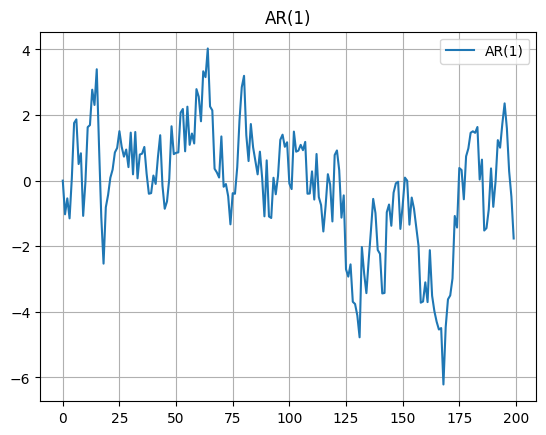

In [23]:
x = np.zeros(size)
for i in range(1, size):
    x[i] = r_1_AR1 * x[i-1] + np.random.normal(0, 1)


plt.plot(x, label='AR(1)')
plt.title('AR(1)')
plt.grid(True)
plt.legend()

## AR(1) КФ

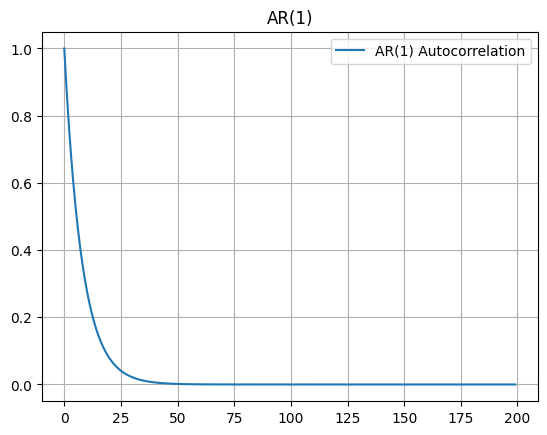

In [24]:
x =  [ro_1_AR1 ** k for k in range(size)]


plt.plot(x, label='AR(1) Autocorrelation')
plt.title('AR(1)')
plt.grid(True)
plt.legend()

## AR(1) Cп

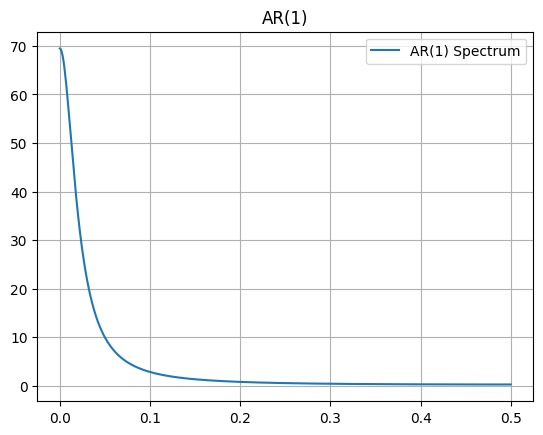

In [25]:
x = 1 / (1 + ro_1_AR1**2 - 2 *ro_1_AR1 * np.cos(2 * np.pi * freq))

plt.plot(freq, x, label='AR(1) Spectrum')
plt.title('AR(1)')
plt.grid(True)
plt.legend()

## AR(2) ВР 

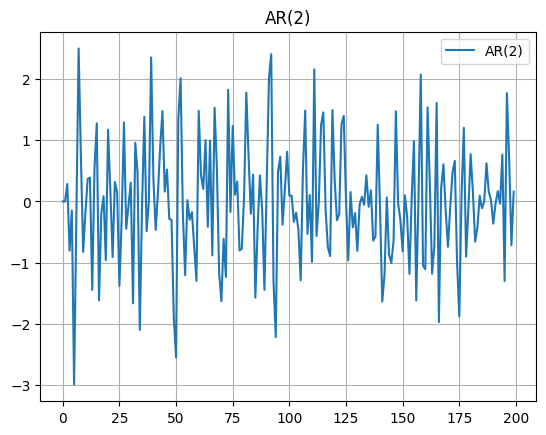

In [26]:
x = np.zeros(size)
for i in range(2, size):
    x[i] = ro_1_AR2 * x[i-1] + ro_2_AR2 * x[i-2] + np.random.normal(0, 1)

plt.plot(x, label='AR(2)')
plt.title('AR(2)')
plt.grid(True)
plt.legend()

## AR(2) КФ

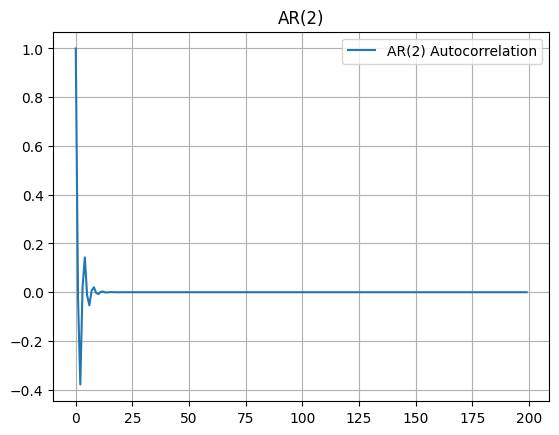

In [27]:
x = [1, ro_1_AR2 / (1 - ro_2_AR2)]
for k in range(2, size):
    x.append(ro_1_AR2 * x[k-1] + ro_2_AR2 * x[k-2])


plt.plot(x, label='AR(2) Autocorrelation')
plt.title('AR(2)')
plt.grid(True)
plt.legend()


## AR(2) Сп

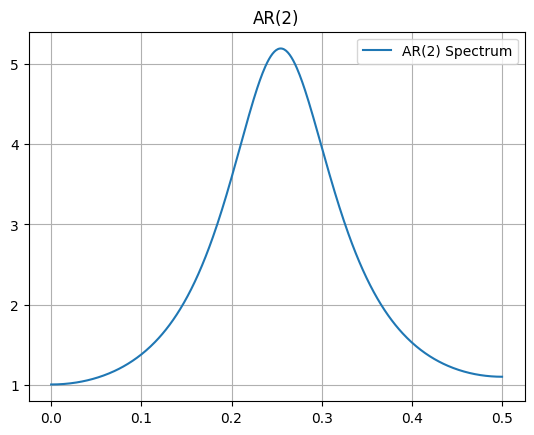

In [28]:
x =  2 * 1 / (1 + ro_1_AR2**2 + ro_2_AR2**2 - 2*ro_1_AR2 * (1 - ro_2_AR2) * np.cos(2 * np.pi * freq) - 2 * ro_2_AR2 * np.cos(4 * np.pi * freq))

plt.plot(freq, x, label='AR(2) Spectrum')
plt.title('AR(2)')
plt.grid(True)
plt.legend()

## MA(1) ВР

Error in callback <function _draw_all_if_interactive at 0x7f76062fb9d0> (for post_execute):


KeyboardInterrupt: 

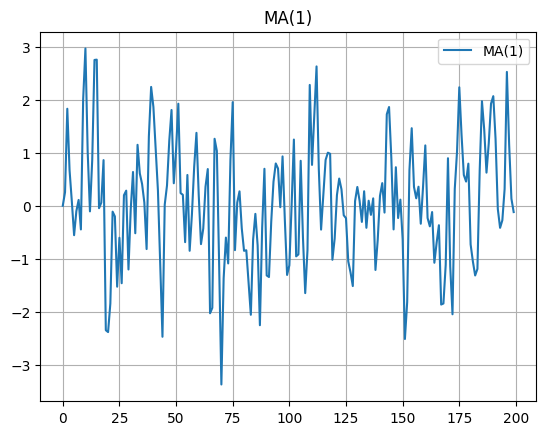

In [29]:
xi = np.random.normal(0, 1, size)
x = np.zeros(size)
for i in range(1, size):
    x[i] = xi[i] - theta_1_MA1 * xi[i-1]

plt.plot(x, label='MA(1)')
plt.title('MA(1)')
plt.grid(True)
plt.legend()

## MA(1) КФ

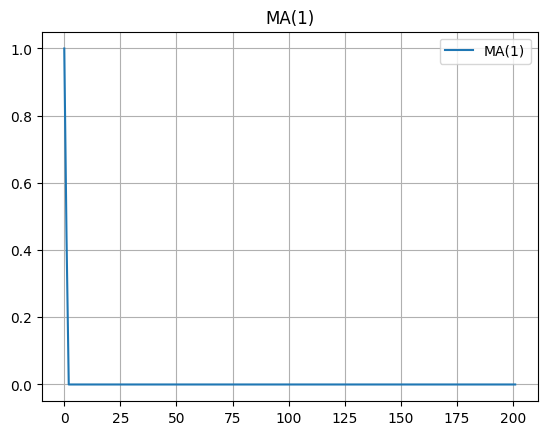

In [15]:

x = [1, -theta_1_MA1 / (1 + theta_1_MA1**2)] + [0] * size

plt.plot(x, label='MA(1)')
plt.title('MA(1)')
plt.grid(True)
plt.legend()

## MA(1) Сп

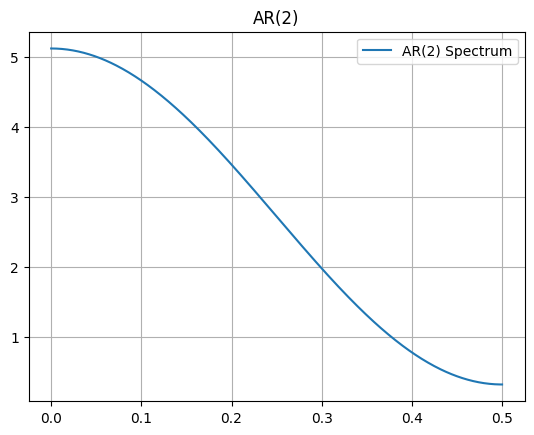

In [16]:
x = 2 * 1 * (1 + theta_1_MA1**2 - 2 * theta_1_MA1 * np.cos(2 * np.pi * freq))


plt.plot(freq, x, label='AR(2) Spectrum')
plt.title('AR(2)')
plt.grid(True)
plt.legend()


## MA(2) ВР

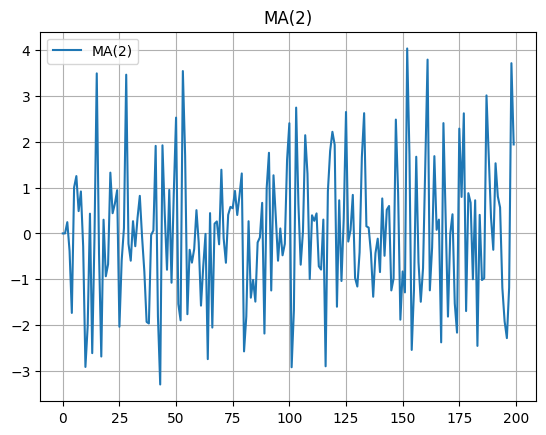

In [17]:
xi = np.random.normal(0, 1, size)
x = np.zeros(size)
for i in range(2, size):
    x[i] = xi[i] - theta_1_MA2 * xi[i-1] - theta_2_MA2 * xi[i-2]


plt.plot(x, label='MA(2)')
plt.title('MA(2)')
plt.grid(True)
plt.legend()


## MA(2) КФ

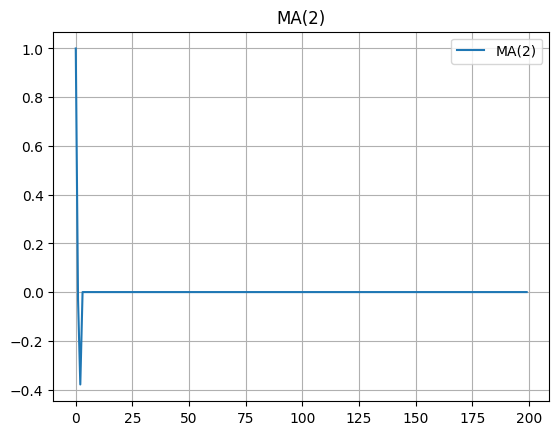

In [18]:
r = [1, (-theta_1_MA2 + theta_1_MA2 * theta_2_MA2) / (1 + theta_1_MA2 ** 2 + theta_2_MA2 ** 2), (-theta_2_MA2) / (1 + theta_1_MA2 ** 2 + theta_2_MA2 ** 2)]
x = r + [0] * (size-3)

plt.plot(x, label='MA(2)')
plt.title('MA(2)')
plt.grid(True)
plt.legend()

## MA(2) Сg

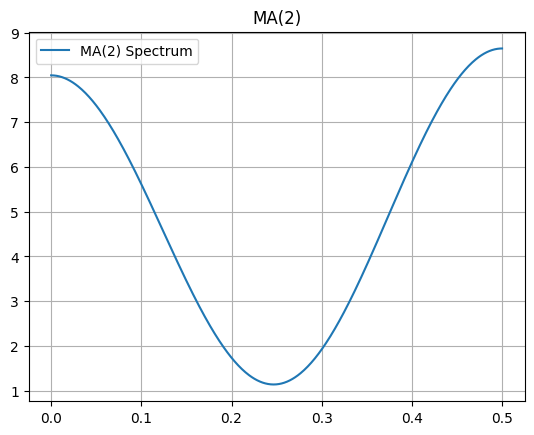

In [19]:
x = 2 * 1 * (1 + theta_1_MA2**2 + theta_2_MA2**2 - 2 * theta_1_MA2 * (1 - theta_2_MA2) * np.cos(2 * np.pi * freq) + 2 * theta_2_MA2 * np.cos(4 * np.pi * freq))

plt.plot(freq, x, label='MA(2) Spectrum')
plt.title('MA(2)')
plt.grid(True)
plt.legend()

##  дисперсия случайного процесса для каждой модели 

In [20]:
print("Дисперсия AR(1):", 1 / (1 - ro_1_AR1**2))
print("Дисперсия AR(2):", (1 - ro_2_AR2) / (1 + ro_2_AR2) * 1 / ((1 + ro_2_AR2)**2 - ro_1_AR2**2))
print("Дисперсия MA(1):", (1 + theta_1_MA1**2) * 1)
print("Дисперсия MA(2):", (1 + theta_1_MA2**2 + theta_2_MA2**2) * 1)


Дисперсия AR(1): 4.4326241134751765
Дисперсия AR(2): 5.784346754148787
Дисперсия MA(1): 1.3599999999999999
Дисперсия MA(2): 2.3725
